In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


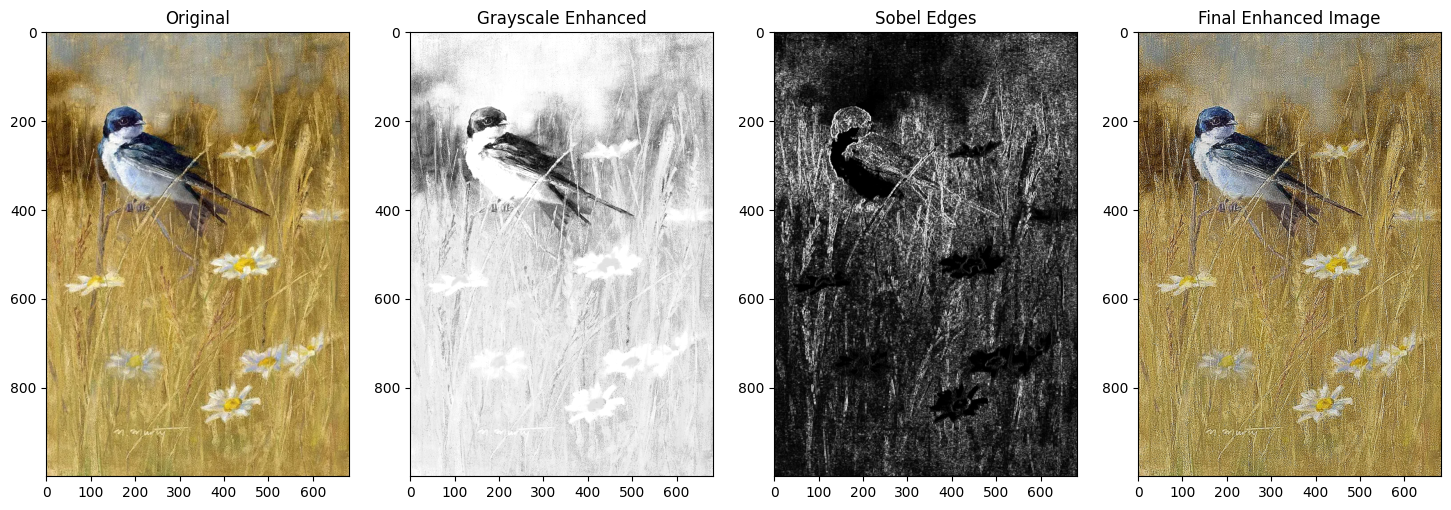

In [ ]:
from PIL import Image, ImageEnhance
import cv2 as cv,cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/drive/MyDrive/lab7im2.webp'

# Read the image using OpenCV
img = cv.imread(image_path)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Convert it to a PIL Image for enhancement
img_pil = Image.fromarray(img_rgb)

# Enhance the brightness
brightness_factor = 1.7
brightness_enhancer = ImageEnhance.Brightness(img_pil)
bright_image = brightness_enhancer.enhance(brightness_factor)

# Enhance the color saturation
color_factor = 1.7
color_enhancer = ImageEnhance.Color(bright_image)
color_image = color_enhancer.enhance(color_factor)

# Convert the enhanced image to grayscale using PIL and then to OpenCV format
gray_image = color_image.convert("L")
gray_image_cv = np.array(gray_image)

# Apply a Laplacian filter for edge detection
laplacian_kernel_size = 3
laplacian = cv2.Laplacian(gray_image_cv, cv2.CV_64F, ksize=laplacian_kernel_size)

# Sobel filters to detect x and y edges
sobel_x_kernel_size = 3
sobel_y_kernel_size = 3
sobelx = cv2.Sobel(gray_image_cv, cv2.CV_64F, 1, 0, ksize=sobel_x_kernel_size)
sobely = cv2.Sobel(gray_image_cv, cv2.CV_64F, 0, 1, ksize=sobel_y_kernel_size)

# Combine Sobel X and Y using a specific method
combined_sobel = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.9, cv2.convertScaleAbs(sobely), 0.1, 0)

# Further enhance the sharpness of the original image using PIL
sharpness_factor = 6
sharpness_enhancer = ImageEnhance.Sharpness(img_pil)
sharp_image = sharpness_enhancer.enhance(sharpness_factor)

# Convert the sharpened image back to OpenCV format for final combination
sharp_image_cv = np.array(sharp_image.convert("RGB"))
sharp_image_cv = cv2.cvtColor(sharp_image_cv, cv2.COLOR_RGB2BGR)

# Combine the sharpened image with the Sobel edge map
# First, normalize the combined Sobel image to the range of the original
normalized_sobel = cv2.normalize(combined_sobel, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
final_image = cv2.addWeighted(sharp_image_cv, 0.9, cv2.cvtColor(normalized_sobel, cv2.COLOR_GRAY2BGR), 0.1, 0)

# Display the results using matplotlib
plt.figure(figsize=(18, 10))
# Subplot index
plt.subplot(1, 4, 1), plt.imshow(img_pil), plt.title('Original')
plt.subplot(1, 4, 2), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Enhanced')
plt.subplot(1, 4, 3), plt.imshow(cv2.cvtColor(normalized_sobel, cv2.COLOR_BGR2RGB)), plt.title('Sobel Edges')
plt.subplot(1, 4, 4), plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)), plt.title('Final Enhanced Image')
plt.show()

\
# **EXTRA**



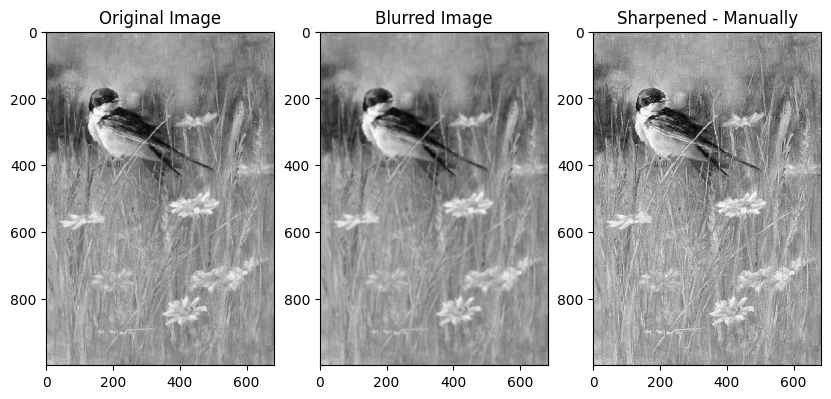

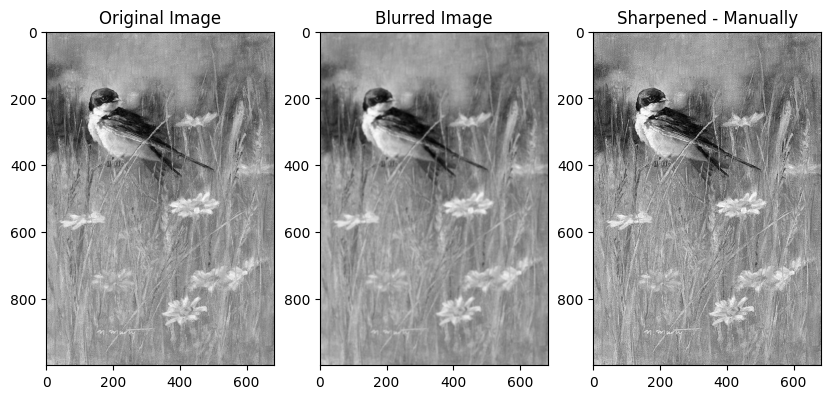

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = '/content/drive/MyDrive/lab7im2.webp'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Task 1: Blur the image
blurred = cv2.GaussianBlur(image, (9, 9), 0)
# 1. Detail = original - blurred
Detail = cv2.subtract(image, blurred)
# 2. Sharpen the image
sharpened = image + (1.5 * Detail)
# [0, 255] range
sharpened = np.clip(sharpened, 0, 255).astype('uint8')

# Display results
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened - Manually")
plt.show()

#------

# 2. Sharpen the image
sharpened = ((1.5 * image) - (blurred * 0.5))
# [0, 255] range
sharpened = np.clip(sharpened, 0, 255).astype('uint8')

# Display results
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.subplot(2, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened - Manually")
plt.show()

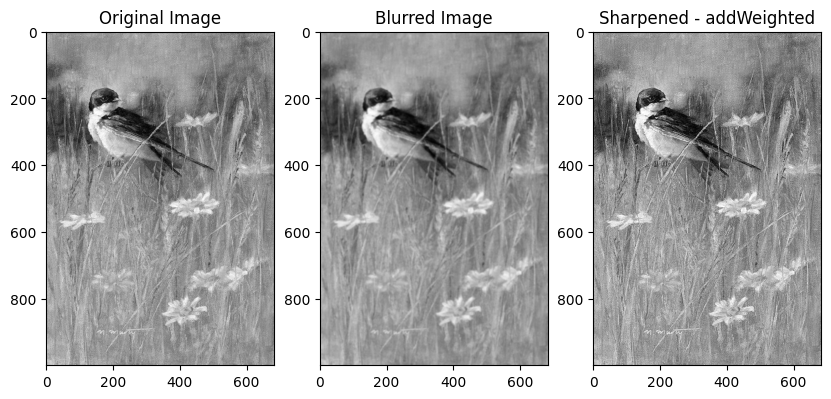

In [ ]:
# Task 1: Blur the image
blurred_image = cv2.GaussianBlur(image, (9, 9), 0)
# Task 2: Implement Unsharp Masking
sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)
plt.figure(figsize=(10, 20))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.subplot(3, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.subplot(3, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened - addWeighted")
plt.show()